In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
'''EXPLORATORY DATA ANALYSIS'''

#BACKGROUND 
#Quote: "Due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA"
#KEY POINT: Data was dimensionally reduced with PCA beforehand
#NOTICE: Confusion matrix accuracy is not meaningful for unbalanced classification. Preferably find accuracy using the Area Under the Precision-Recall Curve (AUPRC)
#INBALANCE RATIO: 0.172%, mans dataset is very inbalanced

#EXPLORE
#TARGET: Know if the transaction was fraudulous or not, here identified with column 'Class'
#DATA: Only numerical data is present. The only categorical type data is the target 'Class'
#PRINCIPAL DTYPES: float64 and int64 for 'Class' column
#DATASET SIZE: 284807 rows × 31 columns 
#NaN IDENTIFICATION: No NaN values in our dataset, which means it will be fully exploited
#Outlier DETECTION: ???

#HYPOTHESIS
#H0: every model will give high accuracy because of the non-balance of our dataset
#H1: fraud rate is dependent of features V0-V28, meanwhile features are independent from each other

#KEY POINTS
#1: At some point, we will decrease in number of data to get more balanced dataframe

'EXPLORATORY DATA ANALYSIS'

In [4]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
dfp = data.copy()
print(dfp.info()) #absence of NaN values hypothesis confirmed 
print(dfp.describe()) #the mean value of every feature column(V1-V28) is around 10e-15/16 
print(dfp['Class'].value_counts())
dfp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<AxesSubplot:>

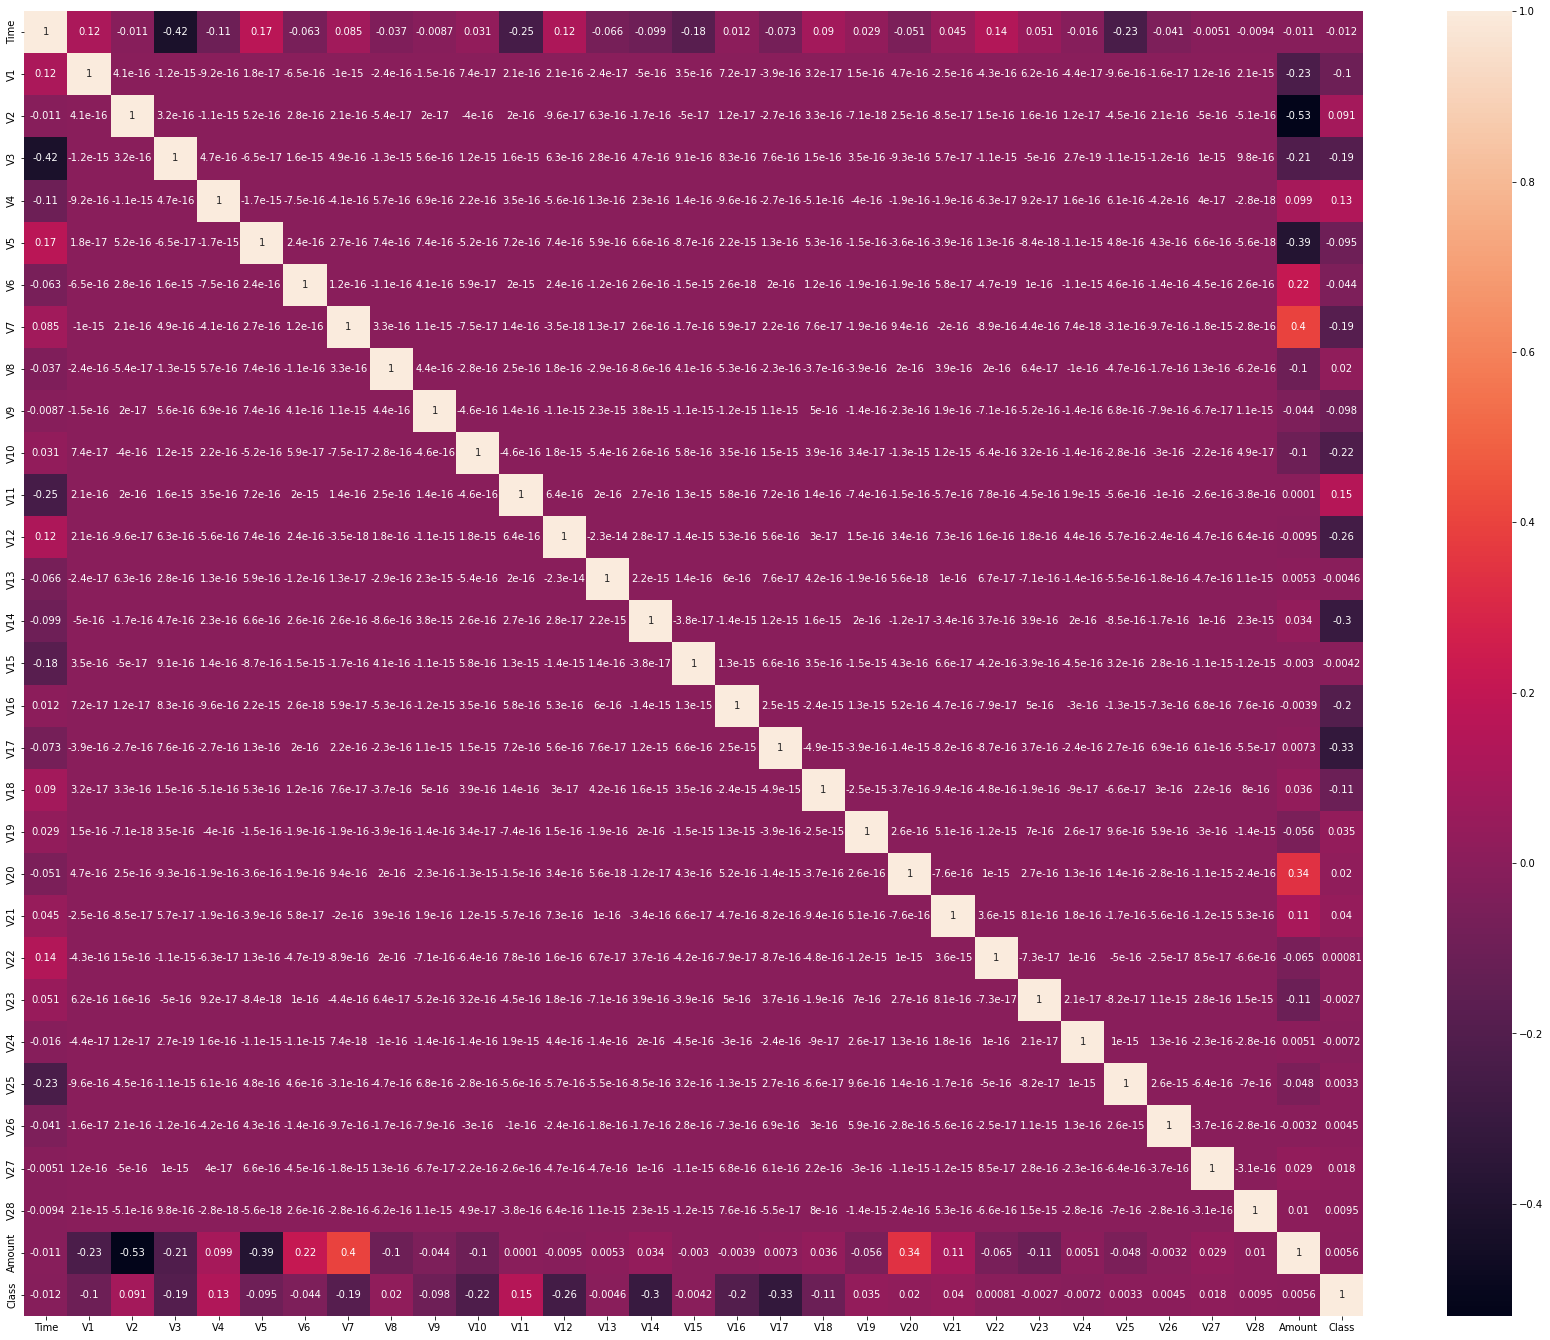

In [5]:
plt.figure(figsize=(30, 24))
sns.heatmap(dfp.corr(), annot=True)
#H1 confirmed, but we unfortunetly can't go deeper for feature selection hence the features are hidden due to confidentiality issues (source)

array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

<Figure size 432x288 with 0 Axes>

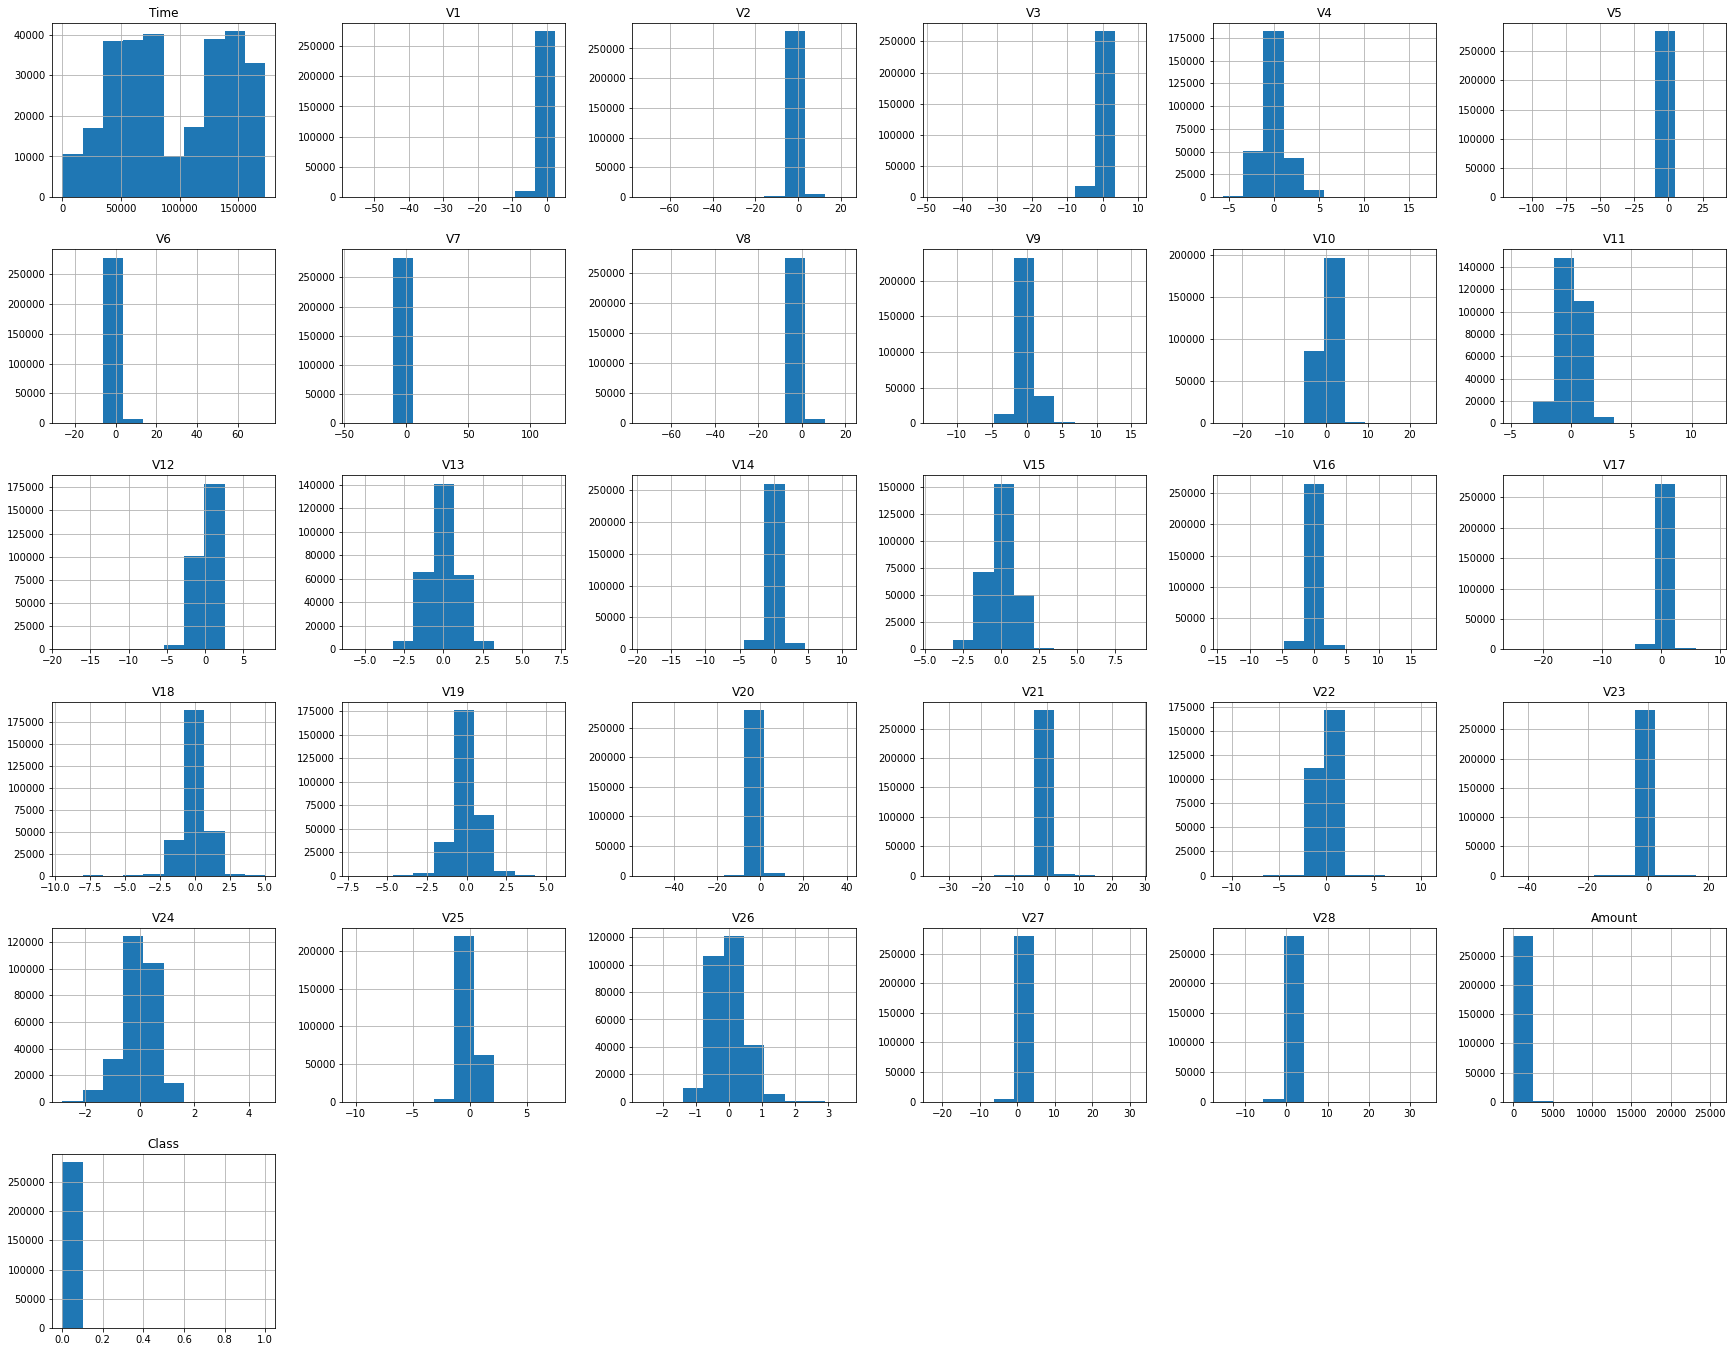

In [6]:
plt.figure()
dfp.hist(figsize=(30, 24))

In [7]:
#for the amount, it goes from 0 to 25k but it is also distributed inequally
#for the Time column, we will put it between values 0 and 1
from sklearn.preprocessing import RobustScaler, MinMaxScaler
dfp['Amount'] = RobustScaler().fit_transform(dfp['Amount'].to_numpy().reshape(-1, 1))
dfp['Time'] = MinMaxScaler().fit_transform(dfp['Time'].to_numpy().reshape(-1, 1))
dfp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [8]:
#Time to split our data
dfm = dfp.sample(frac=1, random_state=0) #shuffling
trainset, valset, testset = dfm[:240000], dfm[240000: 260000], dfm[260000:] 
trainset['Class'].value_counts(), valset['Class'].value_counts(), testset['Class'].value_counts()

(0    239591
 1       409
 Name: Class, dtype: int64,
 0    19962
 1       38
 Name: Class, dtype: int64,
 0    24762
 1       45
 Name: Class, dtype: int64)

In [9]:
X_train, y_train = trainset.drop('Class', axis=1), trainset['Class']
X_val, y_val = valset.drop('Class', axis=1), valset['Class']
X_test, y_test = testset.drop('Class', axis=1), testset['Class']
X_val

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9388,0.079564,-0.797638,1.800965,1.185968,2.844312,0.330734,0.204794,0.691275,0.298619,-1.170611,...,0.133484,0.001198,0.012748,-0.245212,-0.045764,0.470750,0.317791,-0.123925,-0.003260,0.443373
143028,0.492361,1.154032,0.032157,0.675687,1.191593,-0.328102,0.188915,-0.267466,0.160036,0.677829,...,-0.196869,-0.340488,-0.824474,0.097544,-0.328063,0.323970,-0.586855,0.058633,0.025394,-0.125900
198891,0.767964,0.926239,-2.087772,-1.356873,0.821691,-0.736163,0.024059,0.407944,-0.144131,1.252088,...,0.935735,-0.079712,-1.355721,-0.067077,0.437308,-0.572595,-0.827744,-0.086502,0.067528,7.696779
52600,0.263606,-0.827938,0.295575,0.815356,0.456117,-0.043538,0.244135,1.822265,-0.023645,-0.547398,...,0.251132,0.333205,0.725032,0.485057,0.076240,-0.258956,-0.494609,0.112110,0.187627,3.183539
87270,0.356544,-0.104402,-2.837083,-0.428221,0.926454,-1.298970,0.797113,0.204577,-0.005057,-0.790736,...,0.988060,0.041897,-1.014097,-0.784929,-0.855397,0.280640,-0.358471,-0.078624,0.141179,10.231677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23727,0.190310,-1.081201,0.140829,0.598229,-0.276000,1.913241,2.114830,0.866718,0.600612,-0.749711,...,0.110451,0.268268,0.716176,-0.012779,-2.175642,0.176384,-0.281923,0.121842,0.101183,1.361839
184879,0.731683,2.025711,-0.765754,-1.447211,-0.395491,0.368648,1.033383,-0.513226,0.163070,-0.177288,...,-0.674146,-0.114491,0.603581,0.140123,-0.307025,0.108245,0.009596,0.072385,-0.059161,-0.185845
211920,0.802288,-0.307686,1.225339,-0.002803,-0.337019,0.845287,-0.882973,1.044034,-0.127493,-0.055366,...,0.084682,0.048001,0.502100,-0.228162,1.093876,-0.194853,0.520112,0.380491,0.275215,-0.261441
270829,0.950721,1.572848,-1.624485,-1.657009,-0.227630,-0.689607,-0.388462,-0.098925,-0.162253,-0.461452,...,-0.077406,0.162513,0.376052,-0.188393,0.763261,0.065768,-0.102552,-0.056184,-0.007921,3.814714


In [10]:
#starting with the most basic model
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression()
model_log.fit(X_train, y_train)
model_log.score(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9992125

In [11]:
'''__________________________________________________________FUNC_BLOCK__________________________________________________________'''



from sklearn.metrics import classification_report, confusion_matrix

def print_model_output(model, X_validation, y_validation):
    print(classification_report(y_validation, model.predict(X_validation), target_names=['Legit', 'Fraud']))
    y_pred = model.predict(X_validation)
    p_cases = len(y_validation[y_validation == 0])
    n_cases = len(y_validation[y_validation == 1])
    print(f'Valset total transaction quantity: {len(y_validation)}')
    print(f'Legit cases: {p_cases}, predicted: {confusion_matrix(y_validation, y_pred)[0][0]} true legits and {confusion_matrix(y_validation, y_pred)[0][1]} false legits')
    print(f'Fraud cases: {n_cases}, predicted: {confusion_matrix(y_validation, y_pred)[1][0]} false frauds and {confusion_matrix(y_validation, y_pred)[1][1]} true frauds')

    

'''__________________________________________________________FUNC_BLOCK__________________________________________________________'''

'__________________________________________________________FUNC_BLOCK__________________________________________________________'

In [12]:
print_model_output(model_log, X_val, y_val)
#LOCAL CONCLUSION: the simple models like above won't necessarly satisfy the client, we must go for a more complex yet more precise solution 

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     19962
       Fraud       0.91      0.55      0.69        38

    accuracy                           1.00     20000
   macro avg       0.96      0.78      0.84     20000
weighted avg       1.00      1.00      1.00     20000

Valset total transaction quantity: 20000
Legit cases: 19962, predicted: 19960 true legits and 2 false legits
Fraud cases: 38, predicted: 17 false frauds and 21 true frauds


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

model_gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0)
model_gbc.fit(X_train, y_train)
print(classification_report(y_val, model_gbc.predict(X_val), target_names=['Not Fraud', 'Fraud']))

model_rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
model_rf.fit(X_train, y_train)
print(classification_report(y_val, model_rf.predict(X_val), target_names=['Not Fraud', 'Fraud']))

#Both of these complex classifiers did a bad job in terms of recall and f1 score. However, it would be interesting if me go further with our
#RandomForestClassifier putting it in a pipeline and tuning several hyperparameters, since we discovered a precision of 100% for Fraud


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     19962
       Fraud       0.77      0.63      0.70        38

    accuracy                           1.00     20000
   macro avg       0.89      0.82      0.85     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     19962
       Fraud       1.00      0.42      0.59        38

    accuracy                           1.00     20000
   macro avg       1.00      0.71      0.80     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

model_pip_rf = make_pipeline(PolynomialFeatures(degree=2),
                             RandomForestClassifier(random_state=0))
#model_pip_rf.get_params().keys()
model_pip_rf.fit(X_train, y_train)
print_model_output(model_pip_rf, X_val, y_val)

#This model takes way much time to be trainded, we must continue with another, simpler model

In [35]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC(class_weight='balanced')
model_svc.fit(X_train, y_train)
print_model_output(model_svc, X_val, y_val)
#Besseren Ergebnissen, aber müss man jedoch ein Modell mit mehr Potenzial nehmen

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     19962
       Fraud       0.86      0.82      0.84        38

    accuracy                           1.00     20000
   macro avg       0.93      0.91      0.92     20000
weighted avg       1.00      1.00      1.00     20000

Valset total transaction quantity: 20000
Legit cases: 19962, predicted: 19957 true legits and 5 false legits
Fraud cases: 38, predicted: 7 false frauds and 31 true frauds


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

model_seq_shallow = Sequential()
model_seq_shallow.add(InputLayer(X_train.shape[1]))
model_seq_shallow.add(Dense(2, 'relu'))
model_seq_shallow.add(Dense(1, 'sigmoid')) #because we need ether 1 or 0 as output

checkpoint = ModelCheckpoint('model_seq_shallow', save_best_only=True)

model_seq_shallow.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_seq_shallow.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


2022-12-28 20:51:19.520362: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model_seq_shallow.fit(X_train, y_train, 
                      validation_data=(X_val, y_val),
                      epochs=5, callbacks=checkpoint) #looks for out previous checkpoint, if loss is less or accuracy is more to save


2022-12-28 20:51:19.851497: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0314 - accuracy: 0.9980 - val_loss: 0.0037 - val_accuracy: 0.9981


2022-12-28 20:51:32.378396: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/5
7500/7500 [==============================] - 11s 2ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 3/5
7500/7500 [==============================] - 11s 2ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 4/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 5/5
7500/7500 [==============================] - 12s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0026 - val_accuracy: 0.9995


In [16]:
model_seq_shallow.predict(X_train).flatten() #without .flatten() we would have a list of singleton lists, which is not pratique

array([7.8215089e-05, 4.3923879e-05, 1.1729896e-03, ..., 1.2895555e-05,
       5.7476445e-05, 4.2402949e-05], dtype=float32)

In [17]:
#Above, the model was giving probabilities but we want to get directly the class either it was a fraud or legit (1/0)
def nn_predict(model, value_set):
    return (model.predict(value_set).flatten() > 0.5).astype(int)

nn_predict(model_seq_shallow, X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
print(classification_report(y_val, nn_predict(model_seq_shallow, X_val), target_names=['Legit', 'Fraud']))
#Notre modèle s'est fortement amélioré comparant à model_log(sauf précision) ou bien SVG, nous devons donc continuer l'amélioration

              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     19962
       Fraud       0.89      0.84      0.86        38

    accuracy                           1.00     20000
   macro avg       0.94      0.92      0.93     20000
weighted avg       1.00      1.00      1.00     20000



In [20]:
#Interested in common hyperparameters 
#in this code block, we either try new models or work on HPO

#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score

#final_score = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')
#param_grid_pip_rf = { 'polynomialfeatures__degree': [2, 3, 4],
#                      'randomforestclassifier__max_depth': [1, 2],
#                      'randomforestclassifier__n_jobs': [1, 2]
#}
#grid_pip_rf = GridSearchCV(model_pip_rf, param_grid=param_grid_pip_rf, cv=3)
#grid_pip_rf.fit(X_train, y_train)
#print(grid_pip_rf.best_params_)

In [36]:
#Untill now, H0 was confirmed from the precision perspective, and it comes from the fact that the data is heavily imbalanced
#One must shrink our initial data to better deal with it
df_copy = dfm.copy()
df_copy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183484,0.728164,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0.251520,0
255448,0.909967,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,-0.279746,0
244749,0.882396,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,1.034025,0
63919,0.294730,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,3.996367,0
11475,0.115162,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,-0.237546,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,0.801304,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,0.389716,0
86293,0.353992,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,0.041780,0
122579,0.443400,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,0.180256,0
152315,0.562833,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,2.086355,0


In [22]:
frauds = df_copy.query('Class == 1')
legits = df_copy.query('Class == 0')
frauds['Class'].value_counts(), legits['Class'].value_counts()

(1    492
 Name: Class, dtype: int64,
 0    284315
 Name: Class, dtype: int64)

In [23]:
shrinked_df = pd.concat([frauds, legits.sample(len(frauds), random_state=1)])
shrinked_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83053,0.345323,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,-0.219800,1
221041,0.824164,-1.172183,1.661713,-3.049637,2.555058,3.669035,-3.162998,-5.985640,-2.179935,-1.120292,...,-0.812098,-0.295361,-5.988806,0.714381,-1.600024,-0.634783,0.822713,0.494375,-0.279466,1
6717,0.048660,-1.813280,4.917851,-5.926130,5.701500,1.204393,-3.035138,-1.713402,0.561257,-3.796354,...,0.615642,-0.406427,-0.737018,-0.279642,1.106766,0.323885,0.894767,0.569519,-0.293440,1
263080,0.930547,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,...,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,-0.293440,1
231978,0.850722,-2.064240,2.629739,-0.748406,0.694992,0.418178,1.392520,-1.697801,-6.333065,1.724184,...,6.215514,-1.276909,0.459861,-1.051685,0.209178,-0.319859,0.015434,-0.050117,-0.195626,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170164,0.694760,0.076856,-0.570655,-0.103396,-2.243979,0.510643,-0.400118,-0.159654,-0.123577,-2.873323,...,-0.187790,-0.255033,-0.069101,-1.190623,-0.558139,-0.162049,0.175247,0.170757,-0.226927,0
57167,0.276575,1.308684,-0.061791,0.020286,-0.191995,-0.191514,-0.308211,-0.196378,-0.008284,0.088523,...,0.053863,0.157620,-0.180302,-0.421274,0.470245,1.150395,-0.088782,-0.018456,-0.266611,0
248033,0.889949,-1.446831,0.262957,2.012651,4.306493,1.709474,2.541317,-0.234583,0.778338,-1.949072,...,-0.338002,-0.696471,0.636239,-1.717446,-0.131700,0.192383,0.106438,0.036938,-0.042479,0
67706,0.304794,-0.336788,1.163361,1.303065,0.057596,0.057744,-0.975195,0.735047,-0.093024,-0.447421,...,-0.260623,-0.660489,-0.021886,0.343854,-0.149540,0.070723,0.248373,0.098895,-0.275554,0


In [24]:
from sklearn.model_selection import train_test_split

Xb, yb = shrinked_df.drop('Class', axis=1), shrinked_df['Class']
X_trainb, X_testb,  y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.2)
X_valb, y_valb = X_trainb[601:],  y_trainb[601:]
X_trainb, y_trainb = X_trainb[:600],  y_trainb[:600]

In [25]:
#Having a balanced amount of fraud and legitimate transaction, we can test again our models
model_logb = LogisticRegression()
model_logb.fit(X_trainb, y_trainb)
model_logb.score(X_trainb, y_trainb) #lower accuracy, which is normal bc now we have a balanced dataset which makes it more difficult to detect frauds

print_model_output(model=model_logb, X_validation=X_valb, y_validation=y_valb)
#Fraud precision, recall and f1 score are way better than before balancing the dataset

              precision    recall  f1-score   support

       Legit       0.89      0.97      0.92        89
       Fraud       0.97      0.89      0.92        97

    accuracy                           0.92       186
   macro avg       0.93      0.93      0.92       186
weighted avg       0.93      0.92      0.92       186

Valset total transaction quantity: 186
Legit cases: 89, predicted: 86 true legits and 3 false legits
Fraud cases: 97, predicted: 11 false frauds and 86 true frauds


In [26]:
#hence we should try our shallow neural network model on this new dataset and do some HPO
model_seq_shallow_b = Sequential()
model_seq_shallow_b.add(InputLayer(X_trainb.shape[1]))
model_seq_shallow_b.add(Dense(2, 'relu'))
model_seq_shallow_b.add(Dense(1, 'sigmoid')) 
checkpoint_b = ModelCheckpoint('model_seq_shallow_b', save_best_only=True)
model_seq_shallow_b.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_seq_shallow_b.fit(X_trainb, y_trainb, 
                      validation_data=(X_valb, y_valb),
                      epochs=45, callbacks=checkpoint) 
nn_predict(model_seq_shallow_b, X_trainb)
print(classification_report(y_valb, nn_predict(model_seq_shallow_b, X_valb), target_names=['Legit', 'Fraud']))

Epoch 1/45
19/19 [==============================] - 1s 13ms/step - loss: 0.6884 - accuracy: 0.7300 - val_loss: 0.5998 - val_accuracy: 0.7742
Epoch 2/45
19/19 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.7383 - val_loss: 0.5710 - val_accuracy: 0.7849
Epoch 3/45
19/19 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.7467 - val_loss: 0.5457 - val_accuracy: 0.7903
Epoch 4/45
19/19 [==============================] - 0s 4ms/step - loss: 0.6026 - accuracy: 0.7633 - val_loss: 0.5218 - val_accuracy: 0.7903
Epoch 5/45
19/19 [==============================] - 0s 4ms/step - loss: 0.5779 - accuracy: 0.7750 - val_loss: 0.5009 - val_accuracy: 0.7903
Epoch 6/45
19/19 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.7833 - val_loss: 0.4787 - val_accuracy: 0.8118
Epoch 7/45
19/19 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7917 - val_loss: 0.4587 - val_accuracy: 0.8226
Epoch 8/45
19/19 [=

In [27]:
#We have an overall better result with our sequential model with satisfying our validation set, wihich means we must now test our model for the testset
print(classification_report(y_testb, nn_predict(model_seq_shallow_b, X_testb), target_names=['Legit', 'Fraud']))
#Our f1 score as well as recall for the Fraudulous transaction is lower than on validation set, but precision augmented

              precision    recall  f1-score   support

       Legit       0.88      0.98      0.93        93
       Fraud       0.98      0.88      0.93       104

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [28]:
#OVERALL CONCLUSION:
#WE MANAGED TO GET A DECENT MODEL SATISFYING OUR DATASET, THE MOST IMPORTANT PARAMETER WAS, FOR THIS DATASET? THE RECAL SCORE OF FRAUDULOUS TRANSACTIONS

#KEY FOR FUTURE:
#WE DIDN'T REALLY ANALYZED FOR FEATURE SELECTION/ENGINEERING BECAUSE OF THE ANONYMOUSNESS OF OUR DATASET FEATURES, WE COULD HOWEVER TRY TO FIND OTHER INTERESTING
#POINTS WHICH COULD LEAD TO A BETTER MODEL